In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# buuld a sequential model with a similar Alex network structure
model = tf.keras.models.Sequential([
    # conv layer 1
    tf.keras.layers.Conv2D(32, (11, 11), input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'), # a same stride with kernel size = 2
    # conv layer 2
    tf.keras.layers.Conv2D(64, (5, 5), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'), # a same stride with kernel size = 2
    # conv layer 3
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    # conv layer 4
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    # conv layer 5
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    # flatten
    tf.keras.layers.Flatten(),
    # dense layer 1
    tf.keras.layers.Dense(625, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # dense layer 2
    tf.keras.layers.Dense(625, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # output layer
    tf.keras.layers.Dense(10)
], name='mnist_cnn')
model.summary()

Model: "mnist_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        3904      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          73

In [8]:
# load dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [10]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1613 - accuracy: 0.9672
Epoch 2/5
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1302 - accuracy: 0.9726
Epoch 3/5
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1262 - accuracy: 0.9734
Epoch 4/5
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.1176 - accuracy: 0.9750
Epoch 5/5
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.1179 - accuracy: 0.9743


(0.95, 1)

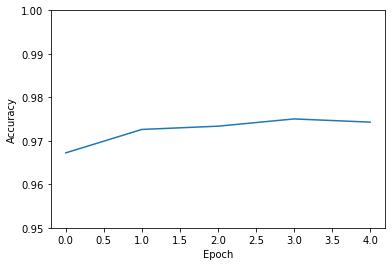

In [14]:
# plot accuracy v.s. epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])

In [15]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 3s - loss: 0.0521 - accuracy: 0.9887


[0.05209383871341365, 0.9887]